<a href="https://colab.research.google.com/github/Sutapa94/Yulu-Hypothesis-Testing/blob/main/Yulu_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Yulu** **Case Study:**

**Business Problem:**

1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

2. How well those variables describe the electric cycle demands


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind, f_oneway , chi2_contingency

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1-suRLKTGeoJvIIM_DHpS9ka7ybUYSTVC/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1-suRLKTGeoJvIIM_DHpS9ka7ybUYSTVC
To: /content/Yulu_Case.csv
100% 648k/648k [00:00<00:00, 96.6MB/s]


In [ ]:
df = pd.read_csv("/content/Yulu_Case.csv")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


Shape, null values and details of the DataFrame

In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.describe(include="object")

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

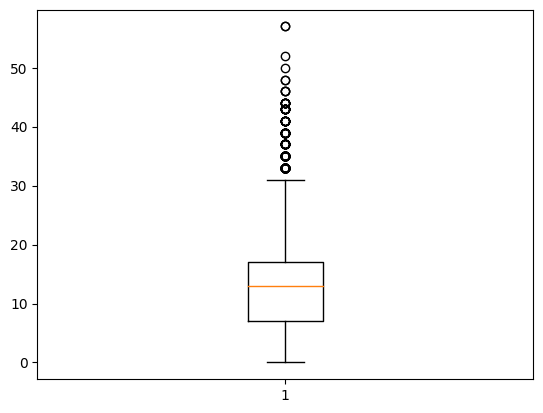

<Figure size 1000x700 with 0 Axes>

In [ ]:
plt.boxplot(df["windspeed"])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [ ]:
Q1 = 7.00
Q3 = 16.99
IQR_windspeed = Q3-Q1
lower_limit = Q1 - 1.5*IQR_windspeed
upper_limit = Q3 + 1.5*IQR_windspeed
print("IQR_windspeed ", IQR_windspeed)
print("lower_limit ", lower_limit)
print("upper_limit ", upper_limit)



IQR_windspeed  9.989999999999998
lower_limit  -7.984999999999998
upper_limit  31.974999999999994


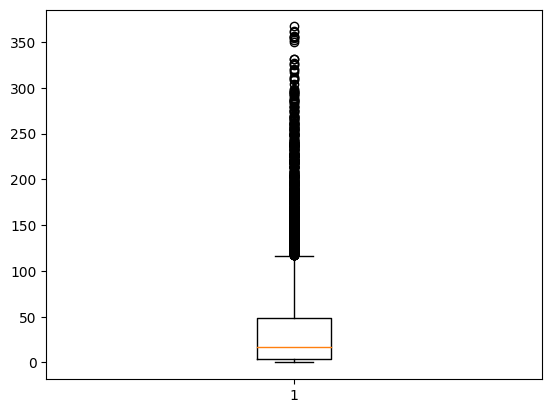

<Figure size 1000x700 with 0 Axes>

In [ ]:
plt.boxplot(df["casual"])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [ ]:
Q1 = 4
Q3 = 49
IQR_casual = Q3-Q1
lower_limit = Q1 - 1.5*IQR_casual
upper_limit = Q3 + 1.5*IQR_casual
print("IQR_casual ", IQR_casual)
print("lower_limit ", lower_limit)
print("upper_limit ", upper_limit)



IQR_casual  45
lower_limit  -63.5
upper_limit  116.5


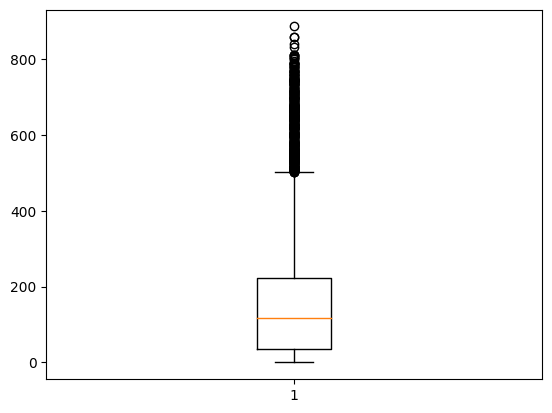

<Figure size 1000x700 with 0 Axes>

In [ ]:
plt.boxplot(df["registered"])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [ ]:
Q1 = 36
Q3 = 222
IQR_registered = Q3-Q1
lower_limit = Q1 - 1.5*IQR_registered
upper_limit = Q3 + 1.5*IQR_registered
print("IQR_registered ", IQR_registered)
print("lower_limit ", lower_limit)
print("upper_limit ", upper_limit)



IQR_registered  186
lower_limit  -243.0
upper_limit  501.0


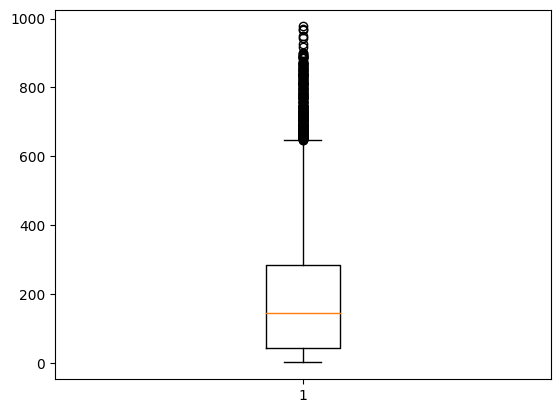

<Figure size 1000x700 with 0 Axes>

In [ ]:
plt.boxplot(df["count"])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [ ]:
Q1 = 42
Q3 = 284
IQR_count = Q3-Q1
lower_limit = Q1 - 1.5*IQR_count
upper_limit = Q3 + 1.5*IQR_count
print("IQR_count ", IQR_count)
print("lower_limit ", lower_limit)
print("upper_limit ", upper_limit)



IQR_count  242
lower_limit  -321.0
upper_limit  647.0


**Windspeed:**

IQR_windspeed  9.989999999999998

lower_limit  -7.984999999999998

upper_limit  31.974999999999994

**Casual:**

IQR_casual  45

lower_limit  -63.5

upper_limit  116.5

**Registered:**

IQR_registered  186

lower_limit  -243.0

upper_limit  501.0

**Count:**

IQR_count  242

lower_limit  -321.0

upper_limit  647.0



**Univariate** **Analysis**

<Axes: xlabel='season'>

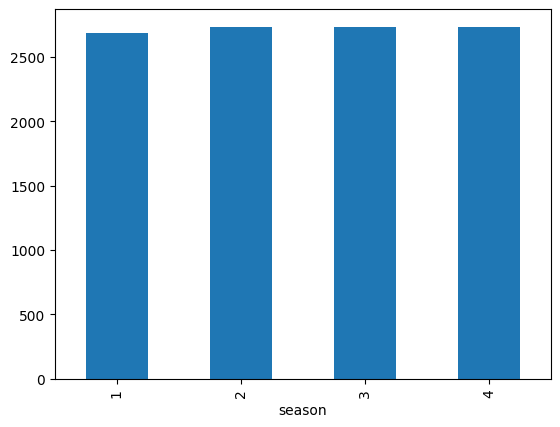

In [ ]:
df.groupby("season")["count"].count().plot(kind="bar")

<Axes: xlabel='workingday'>

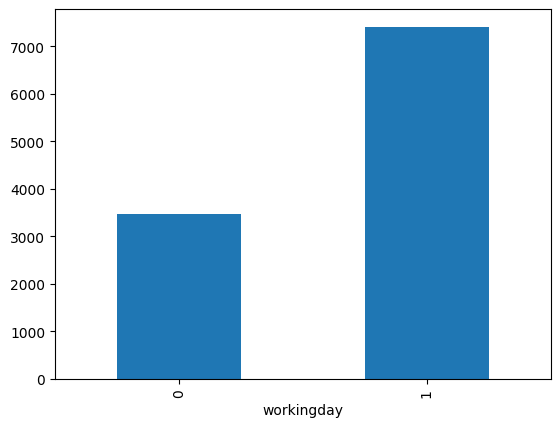

In [ ]:
df.groupby("workingday")["count"].count().plot(kind="bar")

<Axes: xlabel='weather'>

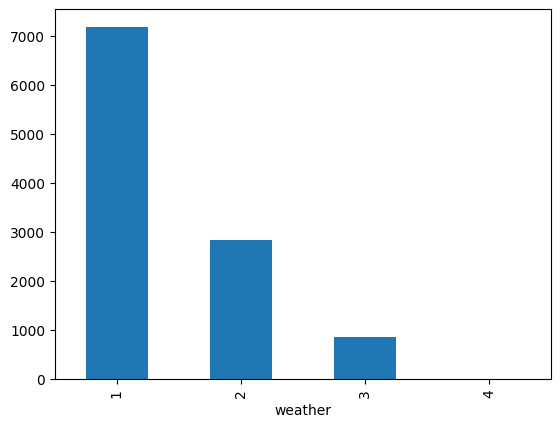

In [ ]:
df.groupby("weather")["count"].count().plot(kind="bar")

<Axes: xlabel='workingday', ylabel='count'>

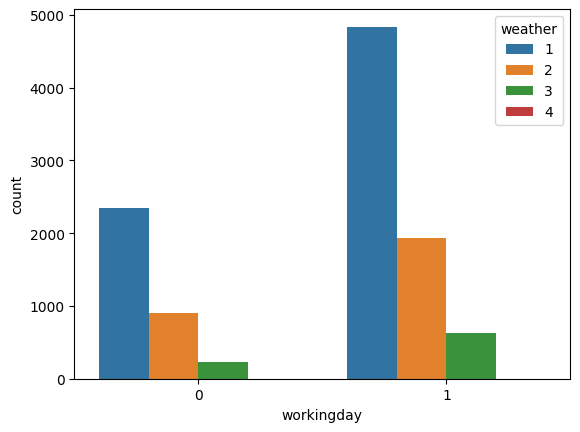

In [ ]:
sns.countplot(data=df , x="workingday" ,hue="weather")

**Bivariate Analysis**

<ipython-input-22-5fedec88925e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.pairplot(df.corr())


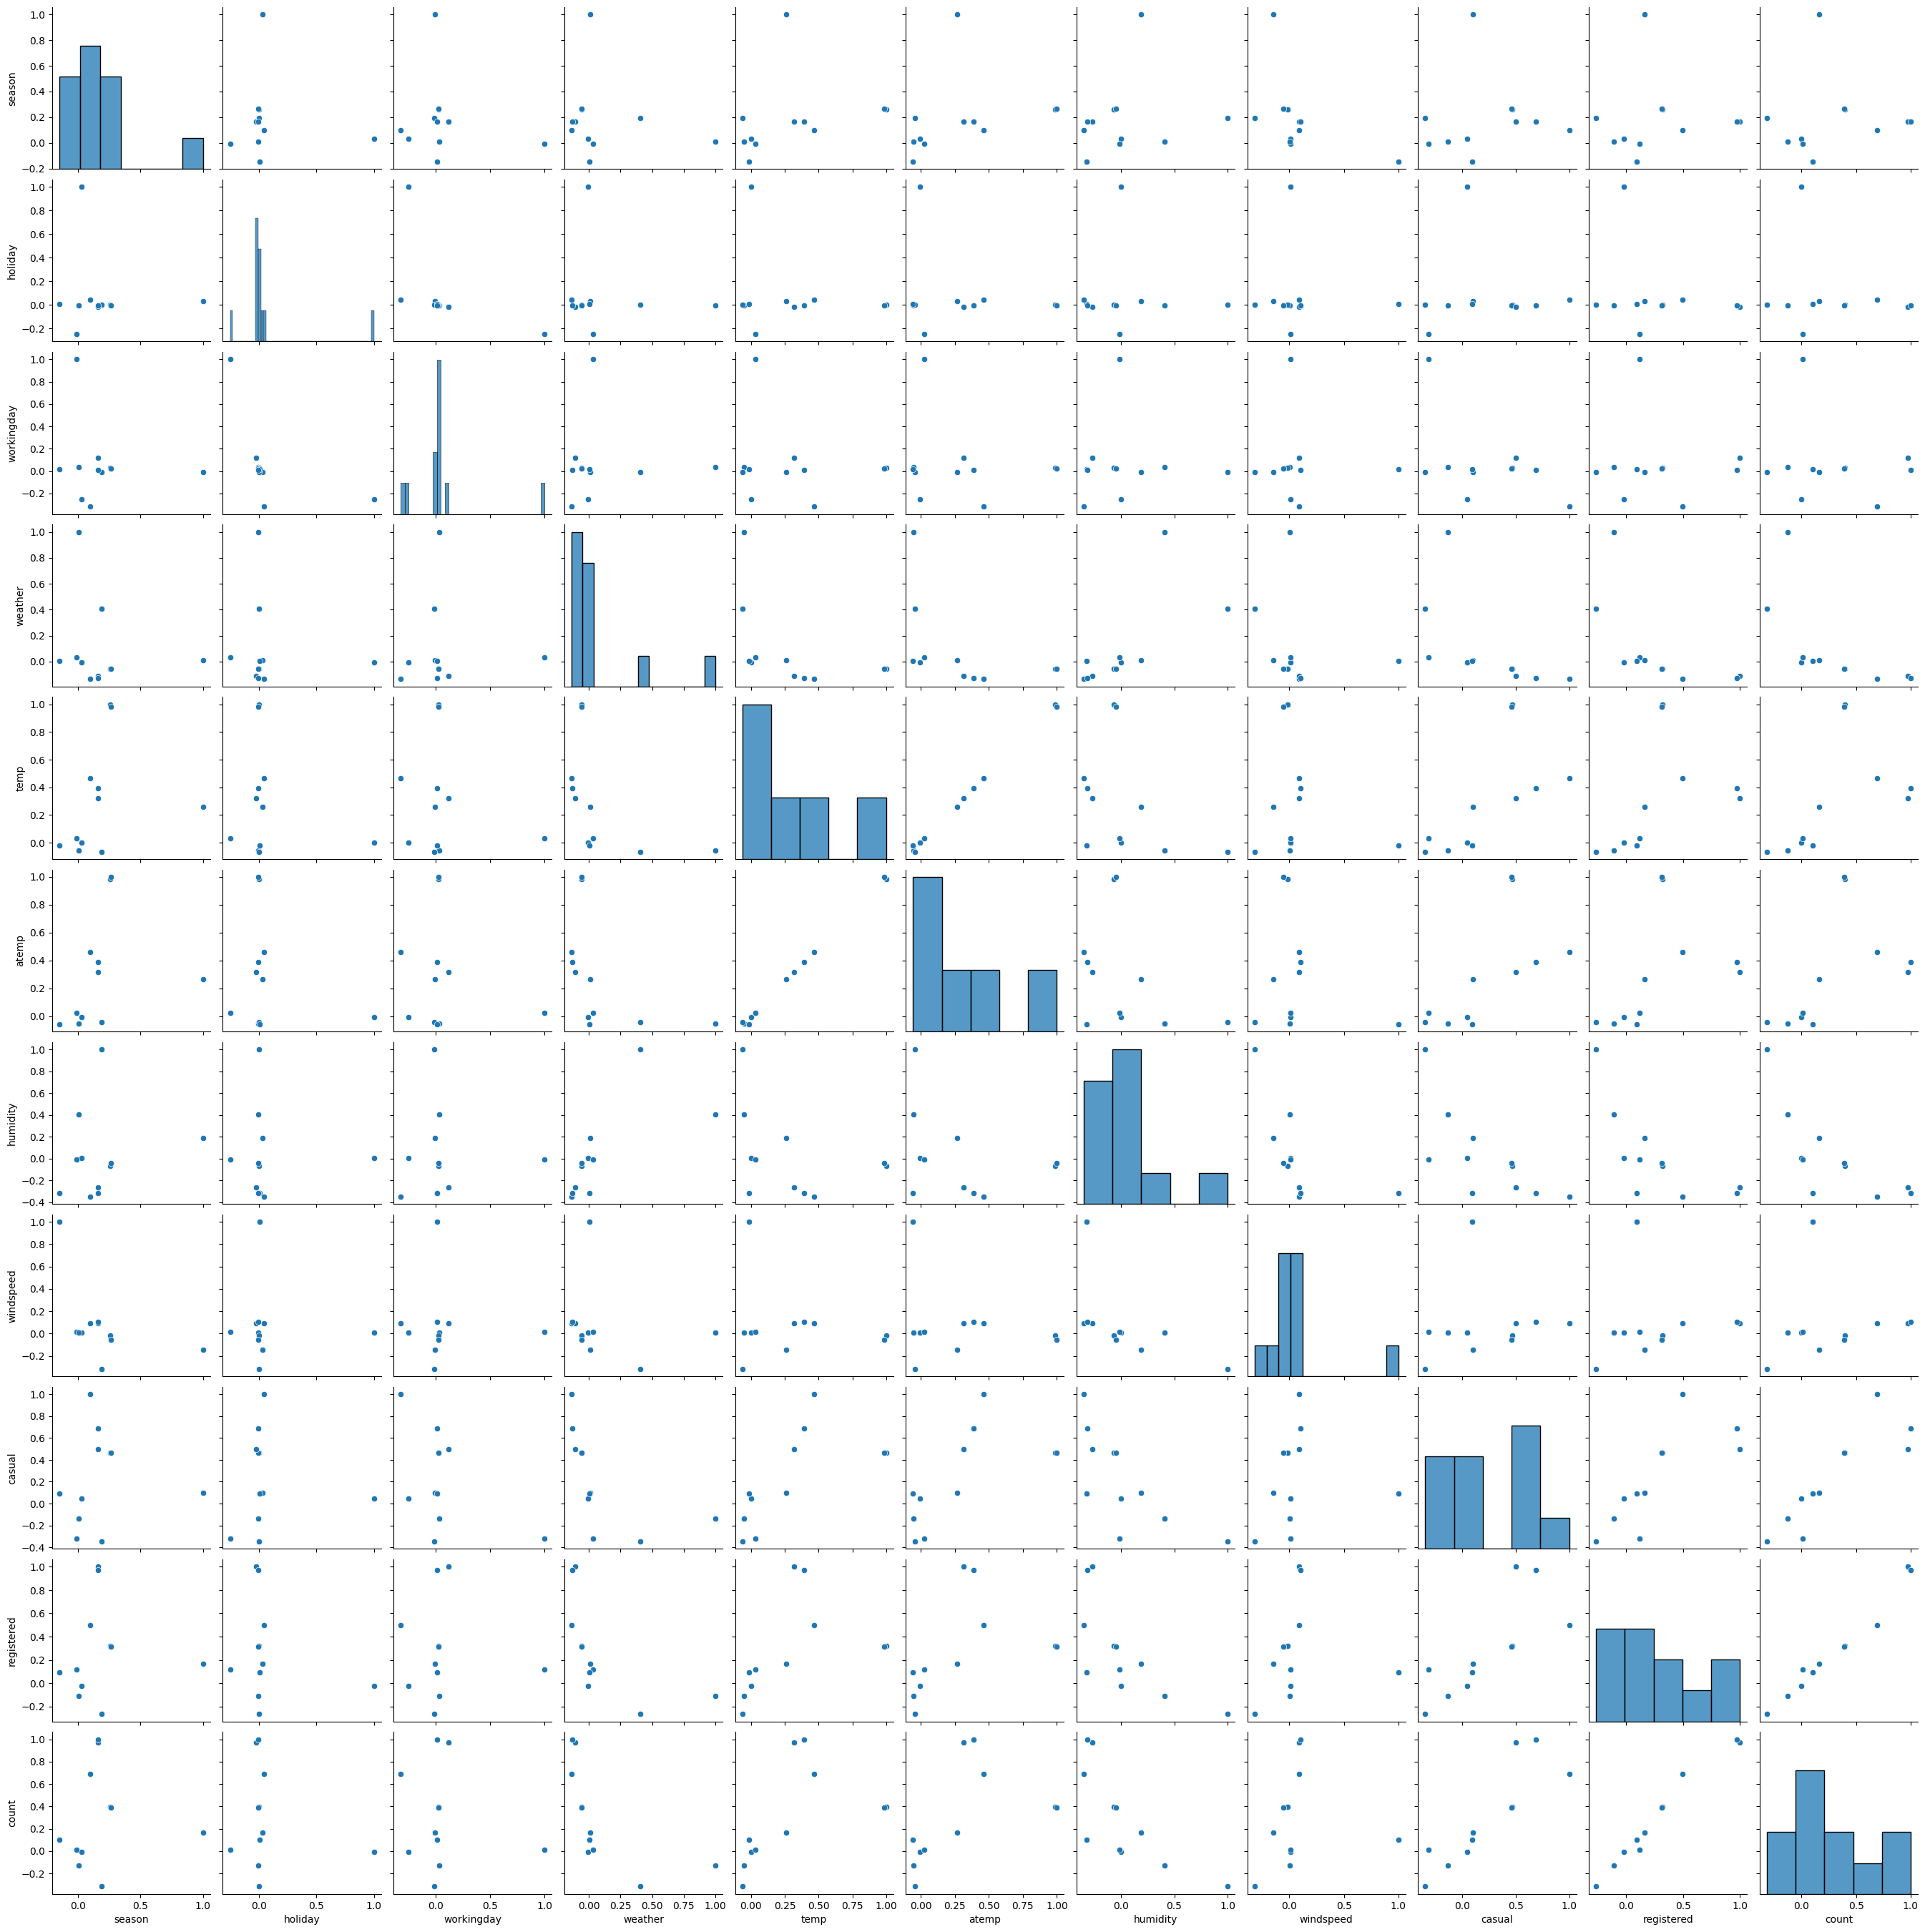

In [ ]:
sns.pairplot(df.corr())

<Axes: xlabel='workingday', ylabel='count'>

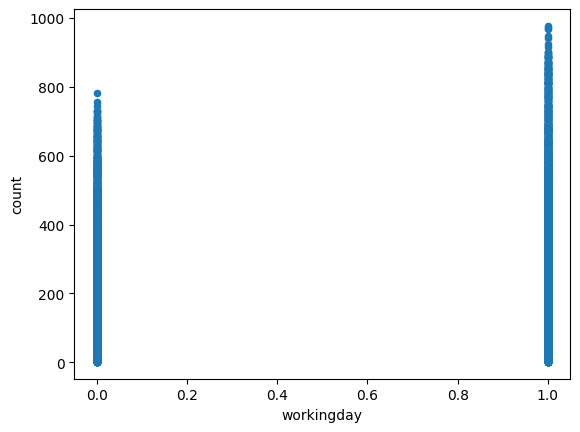

In [ ]:
df.plot.scatter(x="workingday" , y="count")

<Axes: xlabel='season', ylabel='count'>

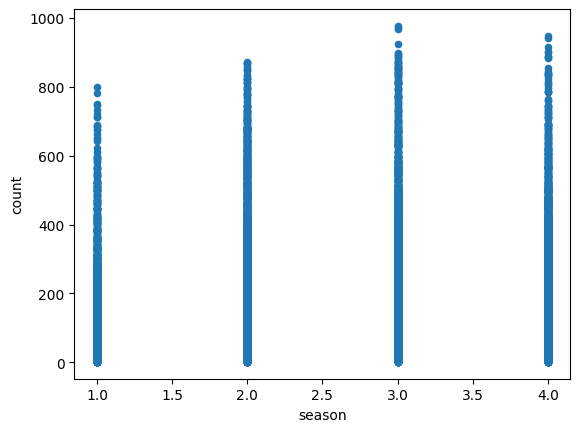

In [ ]:
df.plot.scatter(x="season" , y="count")

<Axes: xlabel='weather', ylabel='count'>

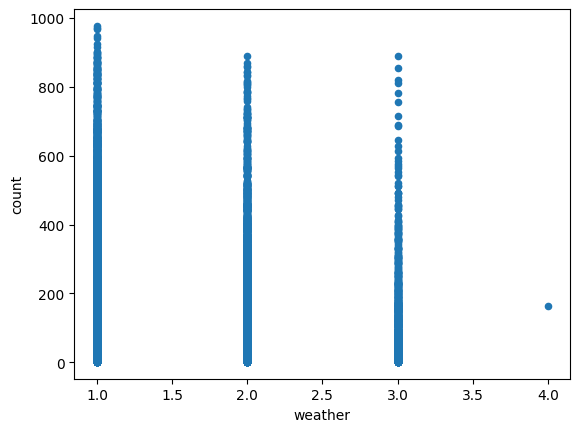

In [ ]:
df.plot.scatter(x="weather" , y="count")

1. Seasons are not that much effective in counts. All seasons have equal amount of data
2. Bike rentals are much higher in Working days
3. Clear, Few clouds, partly cloudy, partly cloudy weather is having high no of bike rentals count.
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog weather having very very less reantal data
5. Casual rentals are having more outliers


#Hypothesis Testing 1 :
#H0 = Working day has no effect on rental bikes
#Ha = Working day has an effect on rental bikes
# alpha = 0.05

In [ ]:
No_of_bikesrental_workingday = df[df["workingday"] == 1]["count"].values
No_of_bikesrental_nonworkingday = df[df["workingday"] == 0]["count"].values
alpha = 0.05
print(No_of_bikesrental_workingday)
print(No_of_bikesrental_nonworkingday)
t_stat, p_value = ttest_ind(No_of_bikesrental_workingday,No_of_bikesrental_nonworkingday)
print("t_stat ", t_stat)
print("p value : ", p_value)


[  5   2   1 ... 168 129  88]
[ 16  40  32 ... 106  89  33]
t_stat  1.2096277376026694
p value :  0.22644804226361348


In [ ]:
if(p_value<alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


p_value is not less than alpha so we Fail to reject Null Hypothesis.

means we cant say working day has an effect on bike rentals.

#Hypothesis Testing 2 :
#H0 = No of bike rentals are similar on different weather and seasons
#Ha = No of bike rentals are different on different weather and seasons
# alpha = 0.05

In [ ]:
weather1 = df[df["weather"] == 1]["count"].values
weather2 = df[df["weather"] == 2]["count"].values
weather3 = df[df["weather"] == 3]["count"].values
weather4 = df[df["weather"] == 4]["count"].values
season1 = df[df["season"] == 1]["count"].values
season2 = df[df["season"] == 2]["count"].values
season3 = df[df["season"] == 3]["count"].values
season4 = df[df["season"] == 4]["count"].values

alpha = 0.05

f_stat, p_value = f_oneway(weather1,weather2,weather3,weather4,season1,season2,season3,season4)
print("f_stat ", f_stat)
print("p value : ", p_value)


f_stat  127.96661249562491
p value :  2.8074771742434642e-185


In [ ]:
if(p_value<alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


p_value is less than alpha so we Reject Null Hypothesis.

means we can say No of bike rentals are different on different weather and seasons

#Hypothesis Testing 3 :
#H0 = Weather is independent on Seasons
#Ha = Weather is dependent on Seasons
#alpha = 0.05

In [ ]:
weather_season = pd.crosstab(index = df["weather"] , columns = df["season"])
weather_season

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [ ]:
alpha = 0.05
chi_stat, p_value , dof, expected = chi2_contingency(weather_season)
print(chi_stat)
print(p_value)
print(dof)
print(expected)

49.15865559689363
1.5499250736864862e-07
9
[[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]


In [ ]:
if(p_value<alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


p_value is less than alpha so we Reject Null Hypothesis.

means we can say Weather is dependent on Seasons

Insights:
1. Clear, Few clouds, partly cloudy, partly cloudy weather having more bike rentals
2. Weather is dependent on Seasons
3. No of bike rentals are different on different weather and seasons
4. Working day has no effect on bike rentals.
5. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog weather having very very less reantal data
6. Casual rentals are having more outliers

Recommendations:

1. Keep more bikes on Clear, Few clouds, partly cloudy, partly cloudy weather
2. As Working day has no effect on bike rentals so all days need to keep more bikes
3. People avoid renatl bikes on Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog weather